In [115]:
import pandas as pd
import math
import numpy as np
from matplotlib import pyplot as plt
from numpy import logical_and as land, logical_or as lor
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

DATA_PATH = '/content/drive/MyDrive/'

ModuleNotFoundError: No module named 'google.colab'

In [3]:
DATA_PATH = 'data/'

In [4]:
df_tweets = pd.read_csv(DATA_PATH+'tweets_clean.csv', sep='#')
df_users = pd.read_csv(DATA_PATH+'users_clean.csv', sep='#')

In [5]:
def plot_hist(dataframe, attribute_name, log=False):
    df = pd.DataFrame()

    if log:
        log_attribute_name = attribute_name+'_log'
        df[log_attribute_name] = np.log(dataframe[attribute_name].values)

        attribute_name = log_attribute_name
        df[attribute_name] = df[attribute_name].replace(-np.inf, 0)

    else:
        df[attribute_name] = dataframe[attribute_name].values
    n_bins = math.ceil(np.log2(len(df[attribute_name])) + 1) #Sturges' rule
    df.hist(attribute_name, bins = n_bins, log=True)

In [6]:
def plot_boxplot(df,col,log=False):
    #Plot the distribution of the indicated column
    plt.boxplot(df_tweets[df[col] != -1.0][col], showmeans=True)
    if log:
        plt.yscale('log')
    plt.show()

For each user save in a Dataframe the list of indices of tweets belonging to them.

In [7]:
df_tweets['index'] = range(0, len(df_tweets))

In [8]:
users_tweets = df_tweets.groupby('user_id')['index'].apply(list).reset_index(name='tweets_indices')
users_tweets

,user_id,tweets_indices
0,0006qod9y,[10560803]
1,000unb,[8684909]
2,000vk,[4305963]
3,0013tom,[4693234]
4,001gi,[3475199]
...,...,...
222280,zzyd6,[1424101]
222281,zzyhkgc34,[8930730]
222282,zzyyu,[1550788]
222283,zzz9v,[5694578]


# How many tweets were published by the user?

In [9]:
df_indicators = pd.DataFrame({'n_tweets' : df_tweets.groupby( [ 'user_id'] ).size()}).reset_index()

In [10]:
df_indicators

,user_id,n_tweets
0,0006qod9y,1
1,000unb,1
2,000vk,1
3,0013tom,1
4,001gi,1
...,...,...
222280,zzyd6,1
222281,zzyhkgc34,1
222282,zzyyu,1
222283,zzz9v,1


# How many tweets are published by the user in a given period of time?

In [12]:
for y in range(2012, 2021):
  df_indicators[str(y) + "_tweets"] = 0

df_indicators

,user_id,n_tweets,2012_tweets,2013_tweets,2014_tweets,2015_tweets,2016_tweets,2017_tweets,2018_tweets,2019_tweets,2020_tweets,2021_tweets,2022_tweets
0,0006qod9y,1,0,0,0,0,0,0,0,0,0,0,0
1,000unb,1,0,0,0,0,0,0,0,0,0,0,0
2,000vk,1,0,0,0,0,0,0,0,0,0,0,0
3,0013tom,1,0,0,0,0,0,0,0,0,0,0,0
4,001gi,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222280,zzyd6,1,0,0,0,0,0,0,0,0,0,0,0
222281,zzyhkgc34,1,0,0,0,0,0,0,0,0,0,0,0
222282,zzyyu,1,0,0,0,0,0,0,0,0,0,0,0
222283,zzz9v,1,0,0,0,0,0,0,0,0,0,0,0


In [31]:
for y in range(2012,2021):
  # Filter all tweets published in a certain year
  tweets_by_y = df_tweets[land(df_tweets['created_at'] >= (str(y)+"-01-01"), 
                               df_tweets['created_at'] <= (str(y)+"-12-31"))][['user_id','created_at']]

  # Count tweets of users in that year
  gby = pd.DataFrame({'n_tweets' : tweets_by_y.groupby( [ 'user_id'] ).size()}).reset_index()
  
  # Transform it in a dictionary
  gby = dict(zip(gby.user_id, gby.n_tweets))

  #print(gby)

  # Select users to modify and update them
  df_indicators.loc[df_indicators['user_id'].isin(gby.keys()), str(y)+'_tweets'] = list(gby.values())

  #print(df_indicators[df_indicators['user_id'].isin(gby.keys())][str(y)+'_tweets'])


{'006dqty41': 1, '01bcm6': 1, '01jq3v8': 1, '01o65u': 1, '025q20m1a': 1, '02g21puj': 1, '02xv': 1, '033': 1, '03iw467q': 1, '03px5yfgkn': 1, '03qxmomz': 1, '048e63': 1, '04pn58naqa': 1, '04umz6ct': 1, '04ur3': 1, '04xs': 1, '059e': 1, '05gp': 1, '05i6cx7lx': 1, '06094o58d': 1, '065to6m': 1, '06a62l8rr': 1, '06so0sg9rk': 1, '06xsvzd': 1, '07hwk0': 1, '07km4': 1, '07opsjo': 1, '07ux': 1, '084': 1, '088ki0x': 1, '08bo': 1, '08feb5': 1, '08g4fb0g': 1, '08id84u': 1, '08qf6j': 1, '08taywi': 1, '09to9sqg09': 1, '09ty05ilbu': 1, '0a3ndv1n': 1, '0a6c7': 1, '0a6nkh2ep': 1, '0ake': 1, '0alk912': 1, '0ano67i71': 1, '0awaewql1': 1, '0b7': 1, '0bch': 1, '0bw': 1, '0cees92jn': 1, '0ch4zy1pj': 1, '0chhiweaxj': 1, '0cn': 1, '0curev1': 1, '0cz8jx': 1, '0d9es42': 1, '0dc5': 1, '0dj11f': 1, '0dj1fct0': 1, '0eb7az': 1, '0eeon': 1, '0ejx0axo': 1, '0epkvn': 1, '0f3tc0lh1': 1, '0fe5j6': 1, '0fo5lr44': 1, '0g0ynuijve': 1, '0g7w': 1, '0g8pwo5lpg': 1, '0gcl1cd2pm': 1, '0h3i4j1': 1, '0hiy1ooyf6': 1, '0hjtck0m': 1

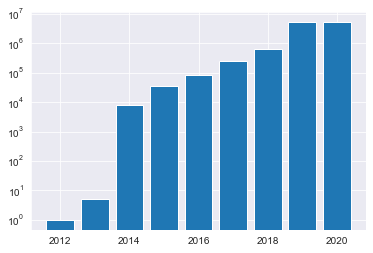

In [40]:
years_col_list = [str(y)+'_tweets' for y in range(2012,2021)]
sum_list = [df_indicators[y].sum() for y in years_col_list]
plt.bar(range(2012,2021), sum_list, log=True)

# Total number of tweets

In [ ]:
tot_n_tweets = df_tweets.shape[0]
tot_n_tweets

# Total number of likes and comments and retweets

In [42]:
total_favorite = df_tweets.favorite_count.sum()
total_favorite

3366938

In [43]:
total_replies = df_tweets.reply_count.sum()
total_replies

129111

In [44]:
total_retweets = df_tweets.retweet_count.sum()
total_retweets

703435637

# Ratio between the number of tweets and the number of likes

In [46]:
ratio_tweets_fav = len(df_tweets) / total_favorite
ratio_tweets_fav

3.4786348902177586

# Entropy of the user

In [88]:
from scipy.stats import entropy

lang_entropy = entropy(np.array(sum_list),base=2)

In [89]:
lang_entropy

1.4803719287995123

# Average length of the tweets per user

In [103]:
df_tweets['length'] = df_tweets.text.astype(str).apply(len)

<AxesSubplot:>

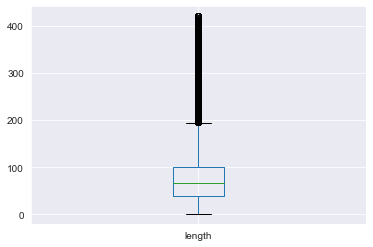

In [104]:
df_tweets.boxplot('length')

In [111]:
len_groupby = df_tweets.groupby('user_id').agg({'length':'mean'})

In [114]:
df_indicators['mean_length'] = len_groupby.length.values
df_indicators

,user_id,n_tweets,2012_tweets,2013_tweets,2014_tweets,2015_tweets,2016_tweets,2017_tweets,2018_tweets,2019_tweets,2020_tweets,2021_tweets,2022_tweets,mean_length
0,0006qod9y,1,0,0,0,0,0,0,0,0,1,0,0,22.0
1,000unb,1,0,0,0,0,0,0,0,1,0,0,0,22.0
2,000vk,1,0,0,0,0,0,0,0,0,1,0,0,110.0
3,0013tom,1,0,0,0,0,0,0,1,0,0,0,0,104.0
4,001gi,1,0,0,0,0,0,0,0,0,1,0,0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222280,zzyd6,1,0,0,0,0,0,0,0,1,0,0,0,66.0
222281,zzyhkgc34,1,0,0,0,0,0,0,0,0,1,0,0,47.0
222282,zzyyu,1,0,0,0,0,0,0,0,0,1,0,0,64.0
222283,zzz9v,1,0,0,0,0,0,0,0,1,0,0,0,3.0


# Average number of special characters in the tweets per user

In [119]:
df_tweets['special_chars'] = df_tweets.text.astype(str).apply(lambda text: len(re.findall("(?=\W)(?=\S)", text)))

In [121]:
len_groupby = df_tweets.groupby('user_id').agg({'special_chars':'mean'})

df_indicators['mean_special_chars'] = len_groupby.special_chars.values
df_indicators

,user_id,n_tweets,2012_tweets,2013_tweets,2014_tweets,2015_tweets,2016_tweets,2017_tweets,2018_tweets,2019_tweets,2020_tweets,2021_tweets,2022_tweets,mean_length,mean_special_chars
0,0006qod9y,1,0,0,0,0,0,0,0,0,1,0,0,22.0,1.0
1,000unb,1,0,0,0,0,0,0,0,1,0,0,0,22.0,1.0
2,000vk,1,0,0,0,0,0,0,0,0,1,0,0,110.0,9.0
3,0013tom,1,0,0,0,0,0,0,1,0,0,0,0,104.0,5.0
4,001gi,1,0,0,0,0,0,0,0,0,1,0,0,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222280,zzyd6,1,0,0,0,0,0,0,0,1,0,0,0,66.0,0.0
222281,zzyhkgc34,1,0,0,0,0,0,0,0,0,1,0,0,47.0,1.0
222282,zzyyu,1,0,0,0,0,0,0,0,0,1,0,0,64.0,1.0
222283,zzz9v,1,0,0,0,0,0,0,0,1,0,0,0,3.0,0.0


# File Checkpoint

In [122]:
df_tweets.to_csv(path_or_buf=DATA_PATH+'tweets_with_indicators.csv', sep='#', index=False)

In [123]:
df_indicators.to_csv(path_or_buf=DATA_PATH+'indicators.csv', sep='#', index=False)

# Mean and variance for each attribute by user

In [124]:
user_groupby = df_tweets.groupby('user_id').agg(['mean','var'])

C:\Users\al\AppData\Local\Temp\ipykernel_11404\1829201184.py:1: FutureWarning: ['created_at', 'text'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  user_groupby = df_tweets.groupby('user_id').agg(['mean','var'])


In [126]:
user_groupby.drop(columns=['index','length','special_chars'], inplace=True)

In [132]:
df_indicators[['retweets_count_mean','retweets_count_var',
              'reply_count_mean','reply_count_var',
              'favorite_count_mean','favorite_count_var',
              'num_hashtags_mean','num_hashtags_var',
              'num_urls_mean','num_urls_var',
              'num_mentions_mean','num_mentions_var',
              'created_at_mean','created_at_var']] = user_groupby.values

In [133]:
df_indicators

,user_id,n_tweets,2012_tweets,2013_tweets,2014_tweets,2015_tweets,2016_tweets,2017_tweets,2018_tweets,2019_tweets,...,favorite_count_mean,favorite_count_var,num_hashtags_mean,num_hashtags_var,num_urls_mean,num_urls_var,num_mentions_mean,num_mentions_var,created_at_mean,created_at_var
0,0006qod9y,1,0,0,0,0,0,0,0,0,...,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,1.586192e+18,NaN
1,000unb,1,0,0,0,0,0,0,0,1,...,0.0,NaN,1.0,NaN,0.0,NaN,0.0,NaN,1.554839e+18,NaN
2,000vk,1,0,0,0,0,0,0,0,0,...,0.0,NaN,0.0,NaN,0.0,NaN,2.0,NaN,1.587992e+18,NaN
3,0013tom,1,0,0,0,0,0,0,1,0,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.523254e+18,NaN
4,001gi,1,0,0,0,0,0,0,0,0,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.586231e+18,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222280,zzyd6,1,0,0,0,0,0,0,0,1,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.560955e+18,NaN
222281,zzyhkgc34,1,0,0,0,0,0,0,0,0,...,1.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.582163e+18,NaN
222282,zzyyu,1,0,0,0,0,0,0,0,0,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.585427e+18,NaN
222283,zzz9v,1,0,0,0,0,0,0,0,1,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.555416e+18,NaN


# Tweeting regularity
We want an indicator that can tell us if the user has a certain regularity in the publication.
We define the tweeting regularity of a user as:
$$ Var( \{\ timestamp_i - timestamp_j\ |\ j = i + 1 \} $$

In [135]:

def tweeting_regularity(user_timestamps):
    user_timestamps = user_timestamps.values.sort()
    diffs = []
    for i in range(1,len(user_timestamps)):
        diffs.append(user_timestamps[i]-user_timestamps[i-1])
    diffs = np.array(diffs)
    return diffs.var()

df_tweets.groupby('user_id').agg({'created_at_conv': tweeting_regularity})

C:\Users\al\AppData\Local\Temp\ipykernel_11404\1564625249.py:9: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the function.
  df_tweets.groupby('user_id').agg({'created_at_conv': tweeting_regularity})


TypeError: object of type 'NoneType' has no len()